SEEDS-REPRODUCABILITY

In [1]:

import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

IMPORTING DEPENDENCIES.

In [2]:

from zipfile import ZipFile
from PIL import Image
from tensorflow.keras import layers, models

CURATING THE DATA

In [3]:
import json
import os

In [4]:
kaggle_credentials = json.load(open("kaggle.json"))

In [5]:
# setup Kaggle API key as environment variables
os.environ['KAGGLE_USERNAME'] = kaggle_credentials["username"]
os.environ['KAGGLE_KEY'] = kaggle_credentials["key"]

In [6]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
plantvillage-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [7]:

!ls

DLPROJECT.ipynb                   kaggle.json
DLsrccode.ipynb                   plant_disease_prediction_model.h5
Potato_early_blight.png           plantvillage dataset
class_indices.json                plantvillage-dataset.zip


In [8]:
from zipfile import ZipFile

In [9]:
# Unzip the downloaded dataset
with ZipFile("plantvillage-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall()

In [10]:
print(os.listdir("plantvillage dataset"))


print(len(os.listdir("plantvillage dataset/segmented")))
print(os.listdir("plantvillage dataset/segmented")[:10])

print(len(os.listdir("plantvillage dataset/color")))
print(os.listdir("plantvillage dataset/color")[:10])

print(len(os.listdir("plantvillage dataset/grayscale")))
print(os.listdir("plantvillage dataset/grayscale")[:10])

['grayscale', 'segmented', 'color']
38
['Strawberry___healthy', 'Grape___Black_rot', 'Potato___Early_blight', 'Blueberry___healthy', 'Corn_(maize)___healthy', 'Tomato___Target_Spot', 'Peach___healthy', 'Potato___Late_blight', 'Tomato___Late_blight', 'Tomato___Tomato_mosaic_virus']
38
['Strawberry___healthy', 'Grape___Black_rot', 'Potato___Early_blight', 'Blueberry___healthy', 'Corn_(maize)___healthy', 'Tomato___Target_Spot', 'Peach___healthy', 'Potato___Late_blight', 'Tomato___Late_blight', 'Tomato___Tomato_mosaic_virus']
38
['Strawberry___healthy', 'Grape___Black_rot', 'Potato___Early_blight', 'Blueberry___healthy', 'Corn_(maize)___healthy', 'Tomato___Target_Spot', 'Peach___healthy', 'Potato___Late_blight', 'Tomato___Late_blight', 'Tomato___Tomato_mosaic_virus']


In [11]:
print(len(os.listdir("plantvillage dataset/color/Grape___healthy")))
print(os.listdir("plantvillage dataset/color/Grape___healthy")[:5])

423
['04991ee7-b17c-420f-90ff-230d4e59361a___Mt.N.V_HL 9055.JPG', 'e949f6bb-cda7-4824-9a97-67337fc164a5___Mt.N.V_HL 6156.JPG', 'bd88082c-b059-4087-88f4-b6ba9cbf07aa___Mt.N.V_HL 6124.JPG', '59ecd16e-8136-4295-93e4-0dc8755f48eb___Mt.N.V_HL 6133.JPG', '215c8317-c0ca-4b35-9ac2-28e01712e367___Mt.N.V_HL 8914.JPG']


DATA PREPROCESSING

In [12]:
# Dataset Path
base_dir = 'plantvillage dataset/color'

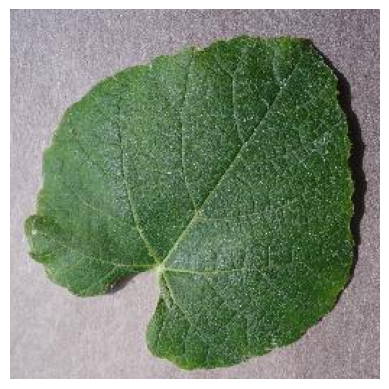

In [13]:
# Importing necessary libraries
import matplotlib.image as mpimg
import matplotlib.pyplot as plt 

# Specifying the path to the image file
image_path = '/Users/sankeerthanleo/Downloads/kaggle/plantvillage dataset/color/Grape___healthy/0ac4ff49-7fbf-4644-98a4-4dc596e2fa87___Mt.N.V_HL 9004.JPG'

# Reading the image
img = mpimg.imread(image_path)

# Displaying the image
plt.imshow(img)  # Plotting the image
plt.axis('off')  # Turning off axis numbers
plt.show()       # Showing the image

In [14]:
# Define the file path for the image
image_path = '/Users/sankeerthanleo/Downloads/kaggle/plantvillage dataset/color/Grape___healthy/0ac4ff49-7fbf-4644-98a4-4dc596e2fa87___Mt.N.V_HL 9004.JPG'

# Read the image data from the specified file path
img = mpimg.imread(image_path)

# Print the image data
print(img)

[[[132 129 140]
  [155 152 163]
  [153 150 161]
  ...
  [119 107 117]
  [108  96 106]
  [151 139 149]]

 [[141 138 149]
  [156 153 164]
  [154 151 162]
  ...
  [118 106 116]
  [134 122 132]
  [123 111 121]]

 [[157 154 165]
  [159 156 167]
  [152 149 160]
  ...
  [129 117 127]
  [109  97 107]
  [108  96 106]]

 ...

 [[194 188 192]
  [191 185 189]
  [187 181 185]
  ...
  [146 134 138]
  [159 147 151]
  [159 147 151]]

 [[192 186 190]
  [188 182 186]
  [186 180 184]
  ...
  [127 115 119]
  [129 117 121]
  [143 131 135]]

 [[182 176 180]
  [180 174 178]
  [179 173 177]
  ...
  [156 144 148]
  [150 138 142]
  [127 115 119]]]


In [15]:
# Image Parameters
img_size = 224
batch_size = 32

TRAINING-TESTING-SPLITTING


In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [17]:
data_gen = ImageDataGenerator(
    rescale=1./255, 
    validation_split=0.2  # Use 20% of data for validation
)

In [18]:
# Configuring the generator for training data
train_generator = data_gen.flow_from_directory(
    base_dir,  # Directory containing the images
    target_size=(img_size, img_size),  # Resize images to this size
    batch_size=batch_size,  # Number of images in each batch
    subset='training',  # Use the subset designated for training
    class_mode='categorical'  # Use categorical labels
)

Found 43456 images belonging to 38 classes.


In [19]:
# Configuring the generator for validation data
validation_generator = data_gen.flow_from_directory(
    base_dir,  # Directory containing the images
    target_size=(img_size, img_size),  # Resize images to this size
    batch_size=batch_size,  # Number of images in each batch
    subset='validation',  # Use the subset designated for validation
    class_mode='categorical'  # Use categorical labels
)

Found 10849 images belonging to 38 classes.


In [20]:
# Defining the CNN model architecture
model = models.Sequential()

# Convolutional layer with 32 filters and a 3x3 kernel, ReLU activation function, and input shape
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
# Max pooling layer with a 2x2 pool size
model.add(layers.MaxPooling2D(2, 2))

# Another convolutional layer with 64 filters and a 3x3 kernel, ReLU activation function
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# Max pooling layer
model.add(layers.MaxPooling2D(2, 2))

# Flatten layer to convert 2D feature maps into a 1D feature vector
model.add(layers.Flatten())
# Dense (fully connected) layer with 256 units and ReLU activation function
model.add(layers.Dense(256, activation='relu'))
# Output layer with units equal to the number of classes and softmax activation function for classification
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [21]:
# model summary
model.summary()
     

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    47,776,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │         9,766 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,805,158 (182.36 MB)

 Trainable params: 47,805,158 (182.36 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
# Compiling the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

MODEL TRAINING

In [37]:
# Train the model
history = model.fit(
    train_generator,  # Training data generator
    steps_per_epoch=train_generator.samples // batch_size,  # Number of steps per epoch
    epochs=5,  # Number of epochs
    validation_data=validation_generator,  # Validation data generator
    validation_steps=validation_generator.samples // batch_size  # Number of validation steps
)


Epoch 1/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 700s 515ms/step - accuracy: 0.9670 - loss: 0.1011 - val_accuracy: 0.8804 - val_loss: 0.4491
Epoch 2/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 0s 54us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.8559
Epoch 3/5


2024-05-10 18:54:01.783824: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
2024-05-10 18:54:01.843681: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1358/1358 ━━━━━━━━━━━━━━━━━━━━ 706s 520ms/step - accuracy: 0.9800 - loss: 0.0590 - val_accuracy: 0.8601 - val_loss: 0.6007
Epoch 4/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 0s 53us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0044
Epoch 5/5


2024-05-10 19:05:48.310717: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-10 19:05:48.370483: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1358/1358 ━━━━━━━━━━━━━━━━━━━━ 725s 534ms/step - accuracy: 0.9816 - loss: 0.0620 - val_accuracy: 0.8596 - val_loss: 0.6082


MODEL EVALUATION

In [ ]:
# Evaluate the model
print("Evaluating the model...")
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Evaluating model...
339/339 ━━━━━━━━━━━━━━━━━━━━ 35s 103ms/step - accuracy: 0.8875 - loss: 0.4401
Validation Accuracy: 88.46%


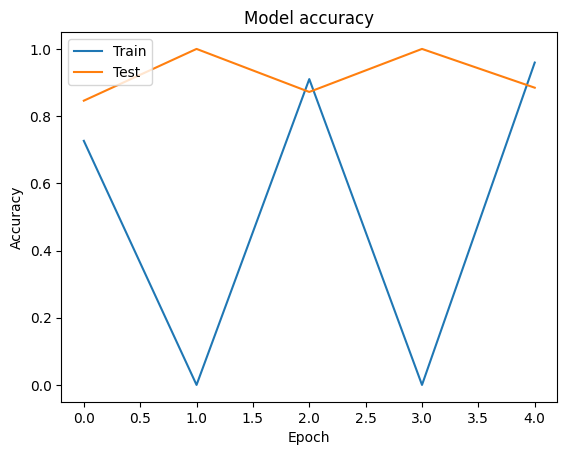

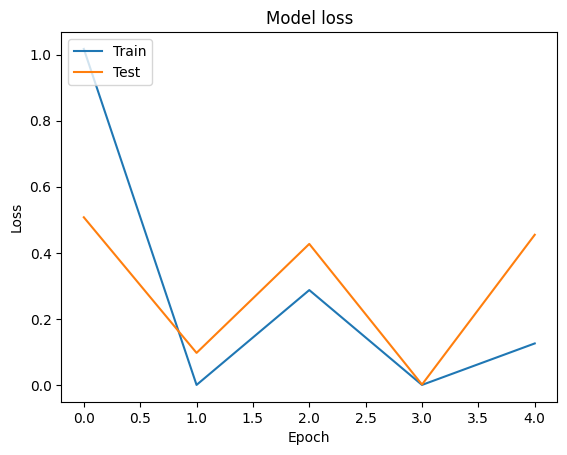

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

BUILDING A PREDICTIVE SYSTEM

In [34]:
# Function to load and preprocess an image using Pillow
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    # Load the image
    img = Image.open(image_path)
    # Resize the image
    img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scale the image values to the range [0, 1]
    img_array = img_array.astype('float32') / 255.
    return img_array

# Function to predict the class of an image
def predict_image_class(model, image_path, class_indices):
    # Preprocess the image
    preprocessed_img = load_and_preprocess_image(image_path)
    # Make predictions using the model
    predictions = model.predict(preprocessed_img)
    # Get the index of the predicted class
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    # Get the name of the predicted class
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [32]:
# Create a mapping from class indices to class names
class_indices = {v: k for k, v in train_generator.class_indices.items()}

In [33]:
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

EXAMPLE USAGE

In [35]:
# saving the class names as json file
json.dump(class_indices, open('class_indices.json', 'w'))

In [24]:
from PIL import Image

In [36]:
# Define the image path for prediction
image_path = 'plantvillage dataset/color/Potato___Early_blight/e4bd2479-dd2f-41ce-9544-4f1804c4ab8b___RS_Early.B 8601.JPG'

# Predict the class name of the image
predicted_class_name = predict_image_class(model, image_path, class_indices)

# Output the predicted class name
print("Predicted Class Name:", predicted_class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
Predicted Class Name: Potato___Early_blight


SAVING THE MODEL

In [ ]:
model.save('plant_disease_prediction_model.h5')